In [16]:
import numpy as np
from sklearn import svm
import matplotlib as mpl
import matplotlib.colors
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


def show_accuracy(a, b):
    acc = a.ravel() == b.ravel()
    # print '正确率：%.2f%%' % (100*float(acc.sum()) / a.size)



In [3]:
data = np.loadtxt('16.bipartition.txt', dtype=np.float, delimiter='\t')
x, y = np.split(data, (2, ), axis=1)
#y[y == 0] = -1
print type(y),y.shape
y = y.ravel()
print type(y),y.shape

<type 'numpy.ndarray'> (100L, 1L)
<type 'numpy.ndarray'> (100L,)


In [4]:
# 分类器
clf_param = (('linear', 0.1), ('linear', 0.5), ('linear', 1), ('linear', 2),
            ('rbf', 1, 0.1), ('rbf', 1, 1), ('rbf', 1, 10), ('rbf', 1, 100),
            ('rbf', 5, 0.1), ('rbf', 5, 1), ('rbf', 5, 10), ('rbf', 5, 100))

线性核，C=0.1
支撑向量的数目： [41 41]
支撑向量的系数： [[-0.1        -0.1        -0.1        -0.1        -0.1        -0.1        -0.1
  -0.1        -0.1        -0.1        -0.1        -0.1        -0.1        -0.1
  -0.1        -0.1        -0.1        -0.1        -0.1        -0.1        -0.1
  -0.1        -0.1        -0.1        -0.1        -0.1        -0.1        -0.1
  -0.1        -0.1        -0.1        -0.1        -0.1        -0.04584545
  -0.1        -0.1        -0.1        -0.1        -0.1        -0.1        -0.1
   0.1         0.1         0.1         0.1         0.1         0.1         0.1
   0.1         0.1         0.1         0.1         0.1         0.1         0.1
   0.1         0.1         0.1         0.1         0.1         0.04584545
   0.1         0.1         0.1         0.1         0.1         0.1         0.1
   0.1         0.1         0.1         0.1         0.1         0.1         0.1
   0.1         0.1         0.1         0.1         0.1         0.1         0.1       ]]
支撑向量： [ 0  1  2  

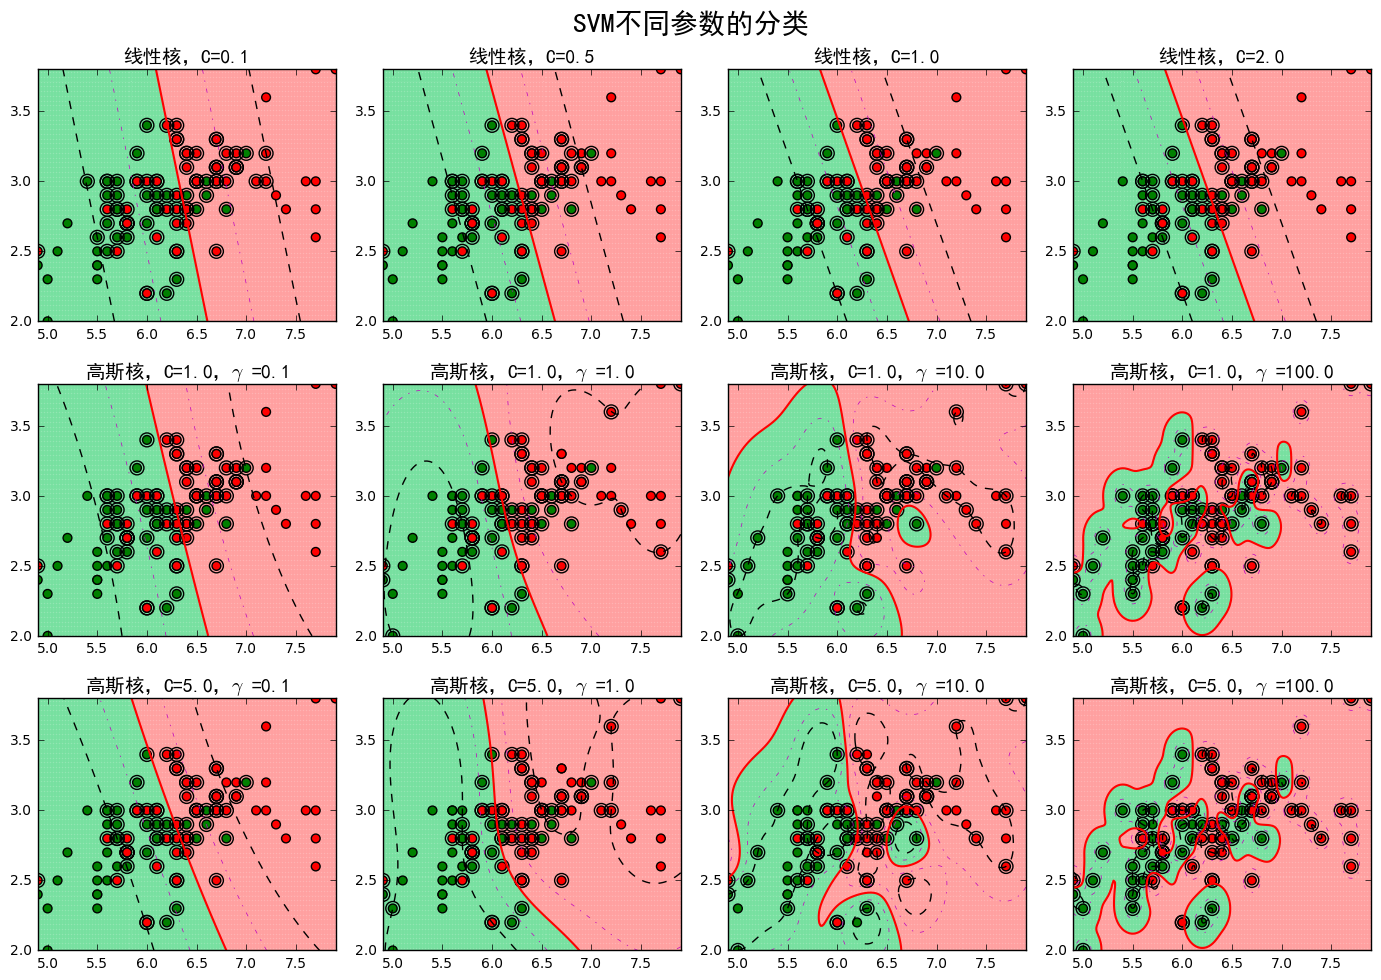

In [17]:
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]  # 生成网格采样点
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FFA0A0'])
cm_dark = mpl.colors.ListedColormap(['g', 'r'])
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(14, 10), facecolor='w')
for i, param in enumerate(clf_param):
    clf = svm.SVC(C=param[1], kernel=param[0])
    if param[0] == 'rbf':
        clf.gamma = param[2]
        title = u'高斯核，C=%.1f，$\gamma$ =%.1f' % (param[1], param[2])
    else:
        title = u'线性核，C=%.1f' % param[1]

    clf.fit(x, y)
    y_hat = clf.predict(x)
    show_accuracy(y_hat, y)  # 准确率

    # 画图
    print title
    print '支撑向量的数目：', clf.n_support_
    print '支撑向量的系数：', clf.dual_coef_
    print '支撑向量：', clf.support_
    plt.subplot(3, 4, i+1)
    grid_hat = clf.predict(grid_test)       # 预测分类值
    grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=40, cmap=cm_dark)      # 样本的显示
    plt.scatter(x[clf.support_, 0], x[clf.support_, 1], edgecolors='k', facecolors='none', s=100, marker='o')   # 支撑向量
    z = clf.decision_function(grid_test)
    # print 'z = \n', z
    z = z.reshape(x1.shape)
    plt.contour(x1, x2, z, colors=list('kmrmk'), linestyles=['--', '-.', '-', '-.', '--'], linewidths=[1, 0.5, 1.5, 0.5, 1], levels=[-1, -0.5, 0, 0.5, 1])
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title(title, fontsize=14)
plt.suptitle(u'SVM不同参数的分类', fontsize=20)
plt.tight_layout(1.4)
plt.subplots_adjust(top=0.92)
plt.savefig('1.png')
plt.show()


In [23]:
clf=svm.SVC(kernel="rbf",gamma=1,random_state=1)
clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
print clf.support_,clf.support_.shape,

[ 0  1  2  4  6  7  8 10 11 12 13 15 17 18 20 21 22 23 24 25 26 27 28 32 33
 35 36 37 41 42 45 46 47 49 50 51 53 54 56 57 58 59 60 61 62 63 64 65 66 68
 69 71 73 76 77 78 81 82 83 84 86 87 88 90 92 95 96 97 98 99] (70L,)


In [39]:
print x[:10,:]
print '_____________________'
print clf.support_vectors_[:5],clf.support_vectors_.shape

[[ 7.   3.2]
 [ 6.4  3.2]
 [ 6.9  3.1]
 [ 5.5  2.3]
 [ 6.5  2.8]
 [ 5.7  2.8]
 [ 6.3  3.3]
 [ 4.9  2.4]
 [ 6.6  2.9]
 [ 5.2  2.7]]
_____________________
[[ 7.   3.2]
 [ 6.4  3.2]
 [ 6.9  3.1]
 [ 6.5  2.8]
 [ 6.3  3.3]] (70L, 2L)


In [33]:
print clf.n_support_

[34 36]


In [37]:
print clf.dual_coef_
print clf.dual_coef_.shape

[[-1.         -1.         -1.         -1.         -1.         -1.         -1.
  -0.72155135 -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -0.48640998
   1.          1.          1.          1.          1.          0.84214971
   1.          0.60662675  1.          1.          0.31885887  1.          1.
   1.          1.          0.59394022  1.          1.          1.          1.
   1.          1.          0.5920032   1.          1.          1.          1.
   1.          1.          0.25438257  1.          1.          1.          1.
   1.          1.        ]]
(1L, 70L)


In [35]:
print clf.intercept_

[ 0.14330767]


In [40]:
print svm.SVC?

In [ ]:
print svm.SVC